In [ ]:
pip install --upgrade google-cloud-storage

     |████████████████████████████████| 106 kB 15.5 MB/s 
     |████████████████████████████████| 95 kB 6.2 MB/s 
     |████████████████████████████████| 75 kB 5.5 MB/s 
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 0.4.1
    Uninstalling google-resumable-media-0.4.1:
      Successfully uninstalled google-resumable-media-0.4.1
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 1.18.1
    Uninstalling google-cloud-storage-1.18.1:
      Successfully uninstalled google-cloud-storage-1.18.1
ERROR: pip's dep

In [ ]:
import os
from argparse import Namespace
from collections import Counter
import json
import re
import string
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install allennlp

     |████████████████████████████████| 738 kB 13.9 MB/s 
     |████████████████████████████████| 3.1 MB 66.1 MB/s 
     |████████████████████████████████| 190 kB 66.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 12.1 MB 31.3 MB/s 
     |████████████████████████████████| 61 kB 612 kB/s 
     |████████████████████████████████| 298 kB 69.7 MB/s 
     |████████████████████████████████| 124 kB 63.3 MB/s 
     |████████████████████████████████| 1.2 MB 53.1 MB/s 
     |████████████████████████████████| 1.7 MB 61.3 MB/s 
     |████████████████████████████████| 259 kB 73.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
     |████████████████████████████████| 167 kB 64.1 MB/s 
     |████████████████████████████████| 131 kB 65.9 MB/s 
     |████████████████████████████████| 59 kB 8.5 MB/s 
     |████████████████

In [ ]:
from allennlp.modules.elmo import Elmo, batch_to_ids

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
!unzip -q "/content/gdrive/MyDrive/final_cit_map_function.zip" 

In [ ]:
!unzip -q "/content/gdrive/MyDrive/archive (2).zip"

In [ ]:
citation = pd.DataFrame(columns=['Text_Tokens','Cit_func','citseg_id'])

In [ ]:
import os
paths=[]
d = "/content/per_func_map_organised_small"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        paths.append(full_path)

In [ ]:
for i in range(len(paths)):
  path = paths[i]
  print(path)
  f=open(path)
  data=json.load(f)
  for i in data.values():
    citation_contexts=i['citation_contexts']
    for j in range(len(citation_contexts)):
      a=[]
      tokens=citation_contexts[j]['citance']['tokens_pp']
      left = citation_contexts[j]['left_ctx']
      left_tokens=[]
      for l in range(len(left)):
        left_tokens.append(left[l]['tokens_pp'])
      right = citation_contexts[j]['right_ctx']
      right_tokens=[]
      for r in range(len(right)):
        right_tokens.append(right[r]['tokens_pp'])
      
      left_tokens=[item for tokens in left_tokens for item in tokens]
      right_tokens=[item for tokens in right_tokens for item in tokens]
      l=len(left_tokens)
      tokens = left_tokens + tokens + right_tokens
      for cit_refs in range(len(citation_contexts[j]['cit_refs'])):
         citseg_id=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
         if citseg_id not in  a:
            a.append(citseg_id)
            c=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
            c = c + l
            f=citation_contexts[j]['cit_refs'][cit_refs]['function_agreed']
            citation = citation.append({'Text_Tokens':tokens, 'Cit_func':f,'citseg_id':c},ignore_index=True)

/content/per_func_map_organised_small/Neut.per_func.map_organised_small.json
/content/per_func_map_organised_small/PMot.per_func.map_organised_small.json
/content/per_func_map_organised_small/Future.per_func.map_organised_small.json
/content/per_func_map_organised_small/PUse.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSim.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCo-.per_func.map_organised_small.json
/content/per_func_map_organised_small/PModi.per_func.map_organised_small.json
/content/per_func_map_organised_small/PBas.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoXY.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoR0.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoGM.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSup.per_func.map_organised_small.json
/content/per_func_map_organised_small/Weak.per_func.map_organised_

In [ ]:
citation

Text_Tokens  ... citseg_id
0     [1, Introduction, ", Unification, -, based, ", Grammars, (, UBGs, ), can, capture, a, wide, variety, of, linguistically, important, syntactic, and, semantic, constraints, ., However, ,, because, these, constraints, can, be, non-local, or, context-sensitive, ,, developing, stochastic, versions, of, UBGs, and, associated, estimation, procedures, is, not, as, straight, -, forward, as, it, is, for...  ...        74
1     [1, Introduction, ", Unification, -, based, ", Grammars, (, UBGs, ), can, capture, a, wide, variety, of, linguistically, important, syntactic, and, semantic, constraints, ., However, ,, because, these, constraints, can, be, non-local, or, context-sensitive, ,, developing, stochastic, versions, of, UBGs, and, associated, estimation, procedures, is, not, as, straight, -, forward, as, it, is, for...  ...        86
2     [", Semantic, ", here, means, that, the, collocations, the, algorithm, discovers, are, not, collocations, among, words, in, the, sense, of, traditional, linguistics, but, collocations, that, reflect, ontological, relations, among, entities, in, given, subject, domains, ., We, expect, that, the, knowledge, to, be, extracted, will, not, only, be, useful, for, disambiguating, sentences, but, also...  ...        74
3     [", Semantic, ", here, means, that, the, collocations, the, algorithm, discovers, are, not, collocations, among, words, in, the, sense, of, traditional, linguistics, but, collocations, that, reflect, ontological, relations, among, entities, in, given, subject, domains, ., We, expect, that, the, knowledge, to, be, extracted, will, not, only, be, useful, for, disambiguating, sentences, but, also...  ...        78
4     [", Semantic, ", here, means, that, the, collocations, the, algorithm, discovers, are, not, collocations, among, words, in, the, sense, of, traditional, linguistics, but, collocations, that, reflect, ontological, relations, among, entities, in, given, subject, domains, ., We, expect, that, the, knowledge, to, be, extracted, will, not, only, be, useful, for, disambiguating, sentences, but, also...  ...        82
5     [", Semantic, ", here, means, that, the, collocations, the, algorithm, discovers, are, not, collocations, among, words, in, the, sense, of, traditional, linguistics, but, collocations, that, reflect, ontological, relations, among, entities, in, given, subject, domains, ., We, expect, that, the, knowledge, to, be, extracted, will, not, only, be, useful, for, disambiguating, sentences, but, also...  ...        86
6     [", Semantic, ", here, means, that, the, collocations, the, algorithm, discovers, are, not, collocations, among, words, in, the, sense, of, traditional, linguistics, but, collocations, that, reflect, ontological, relations, among, entities, in, given, subject, domains, ., We, expect, that, the, knowledge, to, be, extracted, will, not, only, be, useful, for, disambiguating, sentences, but, also...  ...        90
7     [", Semantic, ", here, means, that, the, collocations, the, algorithm, discovers, are, not, collocations, among, words, in, the, sense, of, traditional, linguistics, but, collocations, that, reflect, ontological, relations, among, entities, in, given, subject, domains, ., We, expect, that, the, knowledge, to, be, extracted, will, not, only, be, useful, for, disambiguating, sentences, but, also...  ...        94
8     [Much, research, has, been, done, on, knowledge, acquisition, from, large, -, scale, annotated, corpora, as, a, rich, source, of, linguistic, knowledge, ., Major, works, done, to, create, English, POS, taggers, (, henceforth, ,, ", taggers, ", ), ,, for, example, ,, include, (, CITSEG, ), ,, (, CITSEG, ), ,, (, CITSEG, ), and, (, CITSEG, ), ., The, problem, with, this, framework, ,, however, ,...  ...        43
9     [Much, research, has, been, done, on, knowledge, acquisition, from, large, -, scale, annotated, corpora, as, a, rich, source, of, linguistic, knowledge, ., Major, works, done, to

In [ ]:
citation.dtypes

Text_Tokens    object
Cit_func       object
citseg_id      object
dtype: object

In [ ]:
#split the subset by rating to create new train, val and test splits
import collections
by_rating = collections.defaultdict(list)
for _,row in citation.iterrows():
  by_rating[row.Cit_func].append(row.to_dict())

In [ ]:
#create split data
seed =1021
final_list = []
np.random.seed(seed)
train_proportion = 0.8
val_proportion = 0.2
#test_proportion = 0.05

for _, item_list in sorted(by_rating.items()):
  np.random.shuffle(item_list)

  n_total = len(item_list)
  n_train = int(train_proportion * n_total)
  n_val = int(val_proportion * n_total)
  #n_test = int(test_proportion * n_total)


  #give data points  split attribute

  for item in item_list[:n_train]:
    item['split'] = 'train'

  #for item in item_list[n_train:n_train+n_val]:
   # item['split'] = 'val'

  for item in item_list[n_train:n_train+n_val]:
    item['split'] = 'val'

  #for item in item_list[n_train+n_val:n_train+n_val+n_test]:
   # item['split'] = 'test'


  #Add to final list

  final_list.extend(item_list)


final_citation = pd.DataFrame(final_list)

In [ ]:
final_citation.isna().any()

Text_Tokens    False
Cit_func       False
citseg_id      False
split           True
dtype: bool

In [ ]:
final_citation.isnull().sum()

Text_Tokens     0
Cit_func        0
citseg_id       0
split          10
dtype: int64

In [ ]:
final_citation=final_citation.dropna()

In [ ]:
final_citation

Text_Tokens  ...  split
0     [When, using, the, segmentation, pruning, (, using, HSPELL, ), for, unseen, tokens, ,, performance, improves, for, all, tasks, as, well, ., Yet, we, note, that, the, better, grammars, without, pruning, outperform, the, poorer, grammars, using, this, technique, ,, indicating, that, the, syntactic, context, aids, ,, to, some, extent, ,, the, disambiguation, of, unknown, tokens, ., Table, 2, comp...  ...  train
1     [In, this, paper, ,, we, use, the, Meta-Bootstrapping, and, Basilisk, algorithms, to, learn, lists, of, subjective, nouns, from, a, large, collection, of, unannotated, texts, ., Then, we, train, a, subjectivity, classifier, on, a, small, set, of, annotated, data, ,, using, the, subjective, nouns, as, features, along, with, some, other, previously, identified, subjectivity, features, ., Our, ex...  ...  train
2     [Focusing, solely, on, word, sense, discrimination, also, liberates, us, of, a, serious, constraint, common, to, other, work, on, word, sense, disambiguation, ., If, sense, labeling, is, part, of, the, task, ,, an, outside, source, of, knowledge, is, necessary, to, define, the, senses, ., Regardless, of, whether, it, takes, the, form, of, dictionaries, (, CITSEG, ), ,, thesauri, (, CITSEG, ), ...  ...  train
3     [Here, we, push, the, single, -, framework, conjecture, across, the, board, and, present, a, single, model, that, performs, morphological, segmentation, and, syntactic, disambiguation, in, a, fully, generative, framework, ., We, claim, that, no, particular, morphological, segmentation, is, a-priory, more, likely, for, surface, forms, before, exploring, the, compositional, nature, of, syntactic...  ...  train
4     [also, inefficient, to, extract, rules, separately, from, each, of, these, very, similar, trees, (, or, from, the, cross, -, product, of, k, 2, similar, tree, -, pairs, in, tree, -, to, -, tree, models, ), ., We, instead, propose, a, novel, approach, that, extracts, rules, from, packed, forests, (, Section, 3, ), ,, which, compactly, encodes, many, more, alternatives, than, kbest, lists, ., Ex...  ...  train
5     [We, collect, 100, sets, of, tweets, ,, each, of, which, is, related, to, a, trending, topic, ., For, each, set, of, tweets, ,, we, manually, select, representative, tweets, as, the, summarization, ,, forming, the, gold, -, standard, dataset, ., We, show, that, our, system, compares, favorably, to, the, LexRank, (, CITSEG, ), baseline, in, terms, of, ROUGE, -, 1, and, ROUGE, -, 2., We, also, s...  ...  train
6     [Under, this, PCFG, +, PF, model, ,, the, goal, of, a, parser, is, to, choose, a, parse, that, maximizes, the, following, score, :, ), |, ,, (, max, arg, ), |, (, 1, A, FS, i, i, i, n, i, T, P, S, T, Score, β, ∏, =, =, (, 6, ), Our, model, is, thus, a, simplification, of, more, sophisticated, models, which, integrate, PCFGs, with, features, ,, such, as, those, in, CITSEG, ., Compared, with, th...  ...  train
7     [This, gives, an, implicit, binary, encoding, for, each, word, and, POS, tag, ,, thus, allowing, the, decision, tree, to, ask, about, the, words, and, POS, tags, using, simple, binary, questions, ,, such, as, ', is, the, third, bit, of, the, POS, tag, encoding, equal, to, one, ?, ', Figure, 1, shows, a, POS, classification, tree, ., The, binary, encoding, for, a, POS, tag, is, determined, by, ...  ...  train
8     [The, performance, of, our, system, compares, favorably, to, that, of, systems, trained, on, sets, larger, by, a, factor, of, 100, (, the, results, described, in, Section, 3, were, obtained, following, learning, from, several, dozen, examples, ,, in, comparison, to, thousands, of, examples, in, other, automatic, methods, ), ., Traditionally, ,, the, problem, of, sparse, data, is, approached, b...  ...  train
9     [Compared, to, the, earlier, system, combination, approaches, ,, this, method, is, fully, automatic, and, requires, very, little, additional, information, on, top, of, the, development, set, outputs, from, th

In [ ]:
print(type(final_citation))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
final_citation.dtypes

Text_Tokens    object
Cit_func       object
citseg_id       int64
split          object
dtype: object

In [ ]:
display(final_citation.Cit_func.value_counts())                   # Inspecting the Number of Ratings.
print(" ")

Neut      1475
PUse       761
CoCoGM     300
PMot       290
PSim       210
Weak       160
CoCoXY     156
PBas       101
CoCoR0     100
PSup       100
Future      85
CoCo-       80
PModi       65
Name: Cit_func, dtype: int64

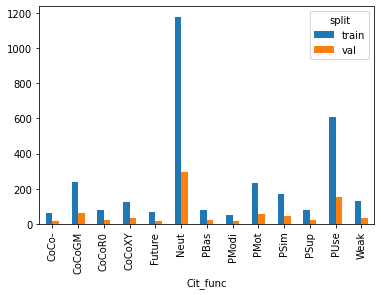

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

In [ ]:
final_citation.groupby(['Cit_func','split']).size()

Cit_func  split
CoCo-     train      64
          val        16
CoCoGM    train     240
          val        60
CoCoR0    train      80
          val        20
CoCoXY    train     125
          val        31
Future    train      68
          val        17
Neut      train    1180
          val       295
PBas      train      81
          val        20
PModi     train      52
          val        13
PMot      train     232
          val        58
PSim      train     168
          val        42
PSup      train      80
          val        20
PUse      train     609
          val       152
Weak      train     128
          val        32
dtype: int64

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "CoCoGM" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "train"').sample(n=400).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "PMot" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "PUse" & split == "train"').sample(n=200).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "val"').sample(n=100).index,inplace=True)

In [ ]:
final_citation.groupby(['Cit_func','split']).size()

Cit_func  split
CoCo-     train     64
          val       16
CoCoGM    train    240
          val       60
CoCoR0    train     80
          val       20
CoCoXY    train    125
          val       31
Future    train     68
          val       17
Neut      train    780
          val      295
PBas      train     81
          val       20
PModi     train     52
          val       13
PMot      train    232
          val       58
PSim      train    168
          val       42
PSup      train     80
          val       20
PUse      train    409
          val      152
Weak      train    128
          val       32
dtype: int64

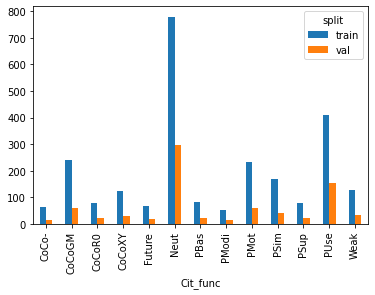

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

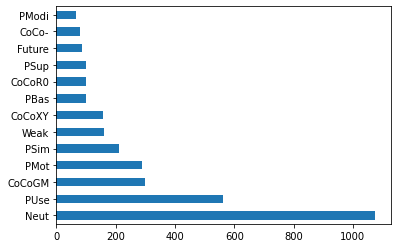

In [ ]:
 final_citation.Cit_func.value_counts().plot(kind='barh')

In [ ]:
final_citation = final_citation.sample(frac=1).reset_index(drop=True)

In [ ]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""

    def __init__(self, token_to_idx=None):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index#,token
            
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        
        Args:
            tokens (list): a list of string tokens
        Returns:
            indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        """
        return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

In [ ]:
class SequenceVocabulary(Vocabulary):
    def __init__(self, token_to_idx=None, unk_token="<UNK>",
                 mask_token="<MASK>", begin_seq_token="<BEGIN>",
                 end_seq_token="<END>"):

        super(SequenceVocabulary, self).__init__(token_to_idx)

        self._mask_token = mask_token
        self._unk_token = unk_token
        self._begin_seq_token = begin_seq_token
        self._end_seq_token = end_seq_token

        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = self.add_token(self._unk_token)
        self.begin_seq_index = self.add_token(self._begin_seq_token)
        self.end_seq_index = self.add_token(self._end_seq_token)

    def to_serializable(self):
        contents = super(SequenceVocabulary, self).to_serializable()
        contents.update({'unk_token': self._unk_token,
                         'mask_token': self._mask_token,
                         'begin_seq_token': self._begin_seq_token,
                         'end_seq_token': self._end_seq_token})
        return contents

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

In [ ]:
class CitationVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""    
    def __init__(self, title_vocab, category_vocab):
        self.title_vocab = title_vocab
        self.category_vocab = category_vocab

    def vectorize(self, title, vector_length=-1):
        """
        Args:
            title (str): the string of words separated by a space
            vector_length (int): an argument for forcing the length of index vector
        Returns:
            the vetorized title (numpy.array)
        """
        indices = [self.title_vocab.begin_seq_index]
        indices.extend(self.title_vocab.lookup_token(token) 
                       for token in title)
        indices.append(self.title_vocab.end_seq_index)

        if vector_length < 0:
            vector_length = len(indices)

        out_vector = np.zeros(vector_length, dtype=np.int64)
        out_vector[:len(indices)] = indices
        out_vector[len(indices):] = self.title_vocab.mask_index
        return out_vector

    @classmethod
    def from_dataframe(cls, citation_df, cutoff=0):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            citation_df (pandas.DataFrame): the target dataset
            cutoff (int): frequency threshold for including in Vocabulary 
        Returns:
            an instance of the CitationVectorizer
        """
        category_vocab = Vocabulary()     
        for category in sorted(set(citation_df.Cit_func)):
            category_vocab.add_token(category)
            #a=category_vocab.add_token(category)
            #print(a)
        word_counts = Counter()
        for title in citation_df.Text_Tokens:
          # print("title is %s"%title)
          for token in title:
              # print("token is %s"%token)
              #if token not in string.punctuation:
              word_counts[token] += 1
        
        title_vocab = SequenceVocabulary()
        for word, word_count in word_counts.items():
            # print("word:word_count are %s:%d"%(word,word_count))
            if word_count >= cutoff:
                title_vocab.add_token(word)
        return cls(title_vocab, category_vocab)

    @classmethod
    def from_serializable(cls, contents):
        
        title_vocab = \
            SequenceVocabulary.from_serializable(contents['title_vocab'])
        category_vocab =  \
            Vocabulary.from_serializable(contents['category_vocab'])

        return cls(title_vocab=title_vocab, category_vocab=category_vocab)

    def to_serializable(self):
        return {'title_vocab': self.title_vocab.to_serializable(),
                'category_vocab': self.category_vocab.to_serializable()}

In [ ]:
class CitationDataset(Dataset):
    def __init__(self, citation_df, vectorizer):
        """
        Args:
            citation_df (pandas.DataFrame): the dataset
            vectorizer (CitationVectorizer): vectorizer instatiated from dataset
        """
        self.citation_df = citation_df
        self._vectorizer = vectorizer

        # +1 if only using begin_seq, +2 if using both begin and end seq tokens
        measure_len = lambda context: len(context)
        self._max_seq_length = max(map(measure_len, citation_df.Text_Tokens)) + 2
        

        self.train_df = self.citation_df[self.citation_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.citation_df[self.citation_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.citation_df[self.citation_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

        # Class weights
        class_counts = citation_df.Cit_func.value_counts().to_dict()
        def sort_key(item):
            return self._vectorizer.category_vocab.lookup_token(item[0])
        sorted_counts = sorted(class_counts.items(), key=sort_key)
        frequencies = [count for _, count in sorted_counts]
        self.class_weights = 1.0 / torch.tensor(frequencies, dtype=torch.float32)

        
        
    @classmethod
    def load_dataset_and_make_vectorizer(cls, citation_csv):
        """Load dataset and make a new vectorizer from scratch
        
        Args:
            citation_csv (str): location of the dataset
        Returns:
            an instance of citationDataset
        """
        citation_df = citation_csv
        train_citation_df = citation_df[citation_df.split=='train']
        return cls(citation_df, CitationVectorizer.from_dataframe(train_citation_df))

    @classmethod
    def load_dataset_and_load_vectorizer(cls, citation_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer. 
        Used in the case in the vectorizer has been cached for re-use
        
        Args:
            surname_csv (str): location of the dataset
            vectorizer_filepath (str): location of the saved vectorizer
        Returns:
            an instance of SurnameDataset
        """
        
        citation_df = citation_csv
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(citation_csv, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        
        Args:
            vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
            an instance of functionVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return NameVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        
        Args:
            vectorizer_filepath (str): the location to save the vectorizer
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer

    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        
        Args:
            index (int): the index to the data point 
        Returns:
            a dictionary holding the data point's features (x_data) and label (y_target)
        """
        
        
        row = self._target_df.iloc[index]
        citseg= row.citseg_id

        # title_vector = \
        #     self._vectorizer.vectorize(row.Text_Tokens, self._max_seq_length)

        # category_index = row.Cit_func
        #print(category_index)
        category_index = self._vectorizer.category_vocab.lookup_token(row.Cit_func)
        # print("title_vector")
        title_vector=row.Text_Tokens
        # print(title_vector)
        
        # return {'x_data': title_vector,
        #         'y_target': category_index,
        #         'citseg_id':citseg
        #         }

        return title_vector, category_index , citseg

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        
        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size

def my_collate(batch):
   print(batch)
   return batch

def batchify(data, bsz, shuffle=False,device="cpu"):
    if shuffle:
        random.shuffle(data)
    sents,tags,citseg = zip(*data)
    nbatch = (len(sents)+bsz-1) // bsz
    # downsample biggest class
    # sents, tags = balance_tags(sents, tags)

    for i in range(nbatch):

        batch = sents[i*bsz:(i+1)*bsz]
        batch_tags = tags[i*bsz:(i+1)*bsz]
        citseg_id  = citseg[i*bsz:(i+1)*bsz]
        batch = batch_to_ids(batch)
        batch_tags = torch.tensor(batch_tags).long()
        citseg_id = torch.tensor(citseg_id).long()
        # lengths = [torch.tensor(l).long() for l in lengths]
        # print("batch")
        # print(batch)
        # print("batch_tags")
        # print(device)
        # print(batch_tags)
        batch=batch.to(device)
        batch_tags=batch_tags.to(device)
        citseg_id = citseg_id.to(device)
        # yield (batch, batch_tags, lengths)
        yield (batch, batch_tags, citseg_id)

In [ ]:
# bilstm output of citseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier1(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier1, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        packed_output, (hidden, cell) = self.lstm(x)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
# h1 + hn + citseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier3(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier3, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*6, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        s=sentences.shape[1]
        packed_output, (hidden, cell) = self.lstm(x)
        h_1 = packed_output[torch.arange(packed_output.size(0)),0]
        h_n = packed_output[torch.arange(packed_output.size(0)),s-1]
        avg_pool = torch.mean(packed_output, 1)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        h_1h_n=torch.cat([h_1,packed_output,h_n],dim=1)
        out = self.fc1(h_1h_n)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
# attention
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        # print("weighted_input.shape")
        # print(weighted_input.shape)
        return (weighted_input)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output = self.attention_layer(packed_output)
        # print(packed_output.shape)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1


In [ ]:
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    """Handle the training state updates.

    Components:
     - Early Stopping: Prevent overfitting.
     - Model Checkpoint: Model is saved if the model is better

    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
        a new train_state
    """

    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # If loss worsened
        if loss_t >= train_state['early_stopping_best_val']:
            # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
            # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # Reset early stopping step
            train_state['early_stopping_step'] = 0

        # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

def compute_accuracy(y_pred, y_target):
    _, y_pred_indices = y_pred.max(dim=1)
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [ ]:
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
        
def load_glove_from_file(glove_filepath):
    """
    Load the GloVe embeddings 
    
    Args:
        glove_filepath (str): path to the glove embeddings file 
    Returns:
        word_to_index (dict), embeddings (numpy.ndarary)
    """

    word_to_index = {}
    embeddings = []
    with open(glove_filepath, "r") as fp:
        for index, line in enumerate(fp):
            line = line.split(" ") # each line: word num1 num2 ...
            word_to_index[line[0]] = index # word = line[0] 
            embedding_i = np.array([float(val) for val in line[1:]])
            embeddings.append(embedding_i)
    return word_to_index, np.stack(embeddings)

def make_embedding_matrix(glove_filepath, words):
    """
    Create embedding matrix for a specific set of words.
    
    Args:
        glove_filepath (str): file path to the glove embeddigns
        words (list): list of words in the dataset
    """
    word_to_idx, glove_embeddings = load_glove_from_file(glove_filepath)
    embedding_size = glove_embeddings.shape[1]
    final_embeddings = np.zeros((len(words), embedding_size))

    for i, word in enumerate(words):
        if word in word_to_idx:
            final_embeddings[i, :] = glove_embeddings[word_to_idx[word]]
        else:
            embedding_i = torch.ones(1, embedding_size)
            torch.nn.init.xavier_uniform_(embedding_i)
            final_embeddings[i, :] = embedding_i
    print(final_embeddings)
    print(final_embeddings.shape)
    return final_embeddings

In [ ]:
from argparse import Namespace

In [ ]:
args = Namespace(
    # Data and Path hyper parameters
    citation_csv=final_citation,
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="model_storage/ch5/document_classification",
    # Model hyper parameters
    glove_filepath='/content/glove.6B.300d.txt', 
    use_glove=False,
    embedding_size=300, 
    hidden_dim=32,
    # Training hyper parameter
    seed=1337, 
    learning_rate=0.001, 
    dropout_p=0.1, 
    batch_size=30, 
    num_epochs=30, 
    num_layers=2,
    early_stopping_criteria=5, 
    # Runtime option
    cuda=True, 
    catch_keyboard_interrupt=True, 
    reload_from_files=False,
    expand_filepaths_to_save_dir=True
) 

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False
    
args.device = torch.device("cuda" if args.cuda else "cpu")
print("Using CUDA: {}".format(args.cuda))

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	model_storage/ch5/document_classification/vectorizer.json
	model_storage/ch5/document_classification/model.pth
Using CUDA: True


In [ ]:
args.use_glove = True

In [ ]:
if args.reload_from_files:
    # training from a checkpoint
    dataset = CitationDataset.load_dataset_and_load_vectorizer(args.citation_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = CitationDataset.load_dataset_and_make_vectorizer(args.citation_csv)
    dataset.save_vectorizer(args.vectorizer_file)
vectorizer = dataset.get_vectorizer()
print(len(vectorizer.title_vocab))
# Use GloVe or randomly initialized embeddings
if args.use_glove:
    words = vectorizer.title_vocab._token_to_idx.keys()
    embeddings = make_embedding_matrix(glove_filepath=args.glove_filepath, 
                                       words=words)
    print("Using pre-trained embeddings")
else:
    print("Not using pre-trained embeddings")
    embeddings = None

classifier = CitationClassifier1(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

print(classifier)

16728
[[-0.11907164 -0.00123771  0.03475953 ...  0.10838436 -0.02188396
  -0.09059642]
 [-0.03658002  0.06027976 -0.01801901 ...  0.11394491 -0.03662597
  -0.09734906]
 [-0.07221913 -0.02466366 -0.03699218 ...  0.0299247  -0.07259606
  -0.04028996]
 ...
 [ 0.024889   -0.15851    -0.19032    ... -0.17296    -0.33603
  -0.25569   ]
 [ 0.37002    -0.45283     0.70053    ...  0.69341     0.24019
   0.065249  ]
 [ 0.10476776 -0.07515869  0.02444218 ...  0.06867117 -0.13481018
  -0.01800561]]
(16728, 300)
Using pre-trained embeddings


downloading: 100%|##########| 336/336 [00:00<00:00, 416kiB/s]
downloading: 100%|##########| 357M/357M [00:22<00:00, 16.3MiB/s]


CitationClassifier1(
  (elmo): Elmo(
    (_elmo_lstm): _ElmoBiLm(
      (_token_embedder): _ElmoCharacterEncoder(
        (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
        (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
        (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
        (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
        (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
        (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
        (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
        (_highways): Highway(
          (_layers): ModuleList(
            (0): Linear(in_features=2048, out_features=4096, bias=True)
            (1): Linear(in_features=2048, out_features=4096, bias=True)
          )
        )
        (_projection): Linear(in_features=2048, out_features=512, bias=True)
      )
      (_elmo_lstm): ElmoLstm(
        (forward_layer_0): LstmCellWithProjection(
   

In [ ]:
embeddings.shape

(16728, 300)

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5415255473210268	 val_acc=12.623274161735699
Epoch 1	 val_loss=2.4981006842393136	 val_acc=16.34122287968442
Epoch 2	 val_loss=2.499197666461651	 val_acc=15.335305719921104
Epoch 3	 val_loss=2.4449058587734513	 val_acc=19.714003944773175
Epoch 4	 val_loss=2.4325928412950955	 val_acc=22.81065088757396
Epoch 5	 val_loss=2.4267276250399075	 val_acc=20.37475345167653
Epoch 6	 val_loss=2.422048999713018	 val_acc=19.97041420118343
Epoch 7	 val_loss=2.408758576099689	 val_acc=20.887573964497044
Epoch 8	 val_loss=2.400452833909254	 val_acc=22.810650887573964
Epoch 9	 val_loss=2.404841615603521	 val_acc=21.89349112426036
Epoch 10	 val_loss=2.4026656701014595	 val_acc=21.25246548323471
Epoch 11	 val_loss=2.39639192361098	 val_acc=23.9447731755424
Epoch 12	 val_loss=2.3644396525162916	 val_acc=25.88757396449704
Epoch 13	 val_loss=2.348540517000051	 val_acc=26.528599605522672
Epoch 14	 val_loss=2.3753538590211143	 val_acc=24.970414201183427
Epoch 15	 val_loss=2.3682661056518555

In [ ]:
print("val loss: {};".format(train_state['val_loss']))
print("val Accuracy: {}".format(train_state['val_acc']))

val loss: [2.5415255473210268, 2.4981006842393136, 2.499197666461651, 2.4449058587734513, 2.4325928412950955, 2.4267276250399075, 2.422048999713018, 2.408758576099689, 2.400452833909254, 2.404841615603521, 2.4026656701014595, 2.39639192361098, 2.3644396525162916, 2.348540517000051, 2.3753538590211143, 2.3682661056518555, 2.3553118797448964, 2.3646443715462317, 2.3664629459381104, 2.359514942535987, 2.3597156084500823, 2.3605123483217683, 2.3564975169988776, 2.3574370512595535, 2.3569553081805887, 2.3567691766298733, 2.3566731673020587, 2.3558324300325832, 2.356358353908245, 2.3566826857053313];
val Accuracy: [12.623274161735699, 16.34122287968442, 15.335305719921104, 19.714003944773175, 22.81065088757396, 20.37475345167653, 19.97041420118343, 20.887573964497044, 22.810650887573964, 21.89349112426036, 21.25246548323471, 23.9447731755424, 25.88757396449704, 26.528599605522672, 24.970414201183427, 24.36883629191321, 25.86785009861933, 25.996055226824456, 26.124260355029584, 27.14990138067

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([10,  8, 11,  9,  3,  7,  8,  6,  9,  9,  1, 12,  6,  6,  0,  8, 11, 10,
        12, 12, 12,  1,  1,  6, 11,  8], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
true_y.shape

(25, 30)

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.20      0.38      0.26        16
      CoCoGM       0.19      0.31      0.23        58
      CoCoR0       0.42      0.40      0.41        20
      CoCoXY       0.28      0.26      0.27        31
      Future       0.24      0.56      0.33        16
        Neut       0.67      0.02      0.04       281
        PBas       0.13      0.47      0.21        19
       PModi       0.04      0.08      0.05        13
        PMot       0.10      0.11      0.10        56
        PSim       0.25      0.45      0.32        40
        PSup       0.06      0.17      0.09        18
        PUse       0.53      0.64      0.58       150
        Weak       0.24      0.53      0.33        32

    accuracy                           0.27       750
   macro avg       0.26      0.34      0.25       750
weighted avg       0.44      0.27      0.23       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

In [ ]:
cf_matrix

array([[ 6,  4,  2,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0],
       [ 2, 18,  0,  1,  3,  0,  5,  1,  4, 10,  2,  9,  3],
       [ 6,  0,  8,  2,  0,  0,  1,  0,  0,  0,  1,  2,  0],
       [ 2,  3,  0,  8,  0,  0,  3,  1,  2,  1,  3,  4,  4],
       [ 2,  2,  1,  0,  9,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1, 43,  1,  7, 12,  6, 33, 10, 39, 19, 26, 50, 34],
       [ 0,  2,  0,  0,  0,  1,  9,  2,  1,  2,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  0,  1,  1,  0,  2,  0,  6,  1],
       [ 3,  7,  2,  3,  5,  0,  5,  1,  6,  4,  7,  6,  7],
       [ 0,  4,  0,  0,  1,  0,  2,  3,  2, 18,  2,  5,  3],
       [ 1,  6,  0,  1,  4,  0,  1,  0,  0,  1,  3,  1,  0],
       [ 5,  7,  3,  5,  1,  1,  6,  7,  3, 10,  3, 96,  3],
       [ 1,  0,  2,  1,  3,  1,  1,  0,  2,  1,  2,  1, 17]])

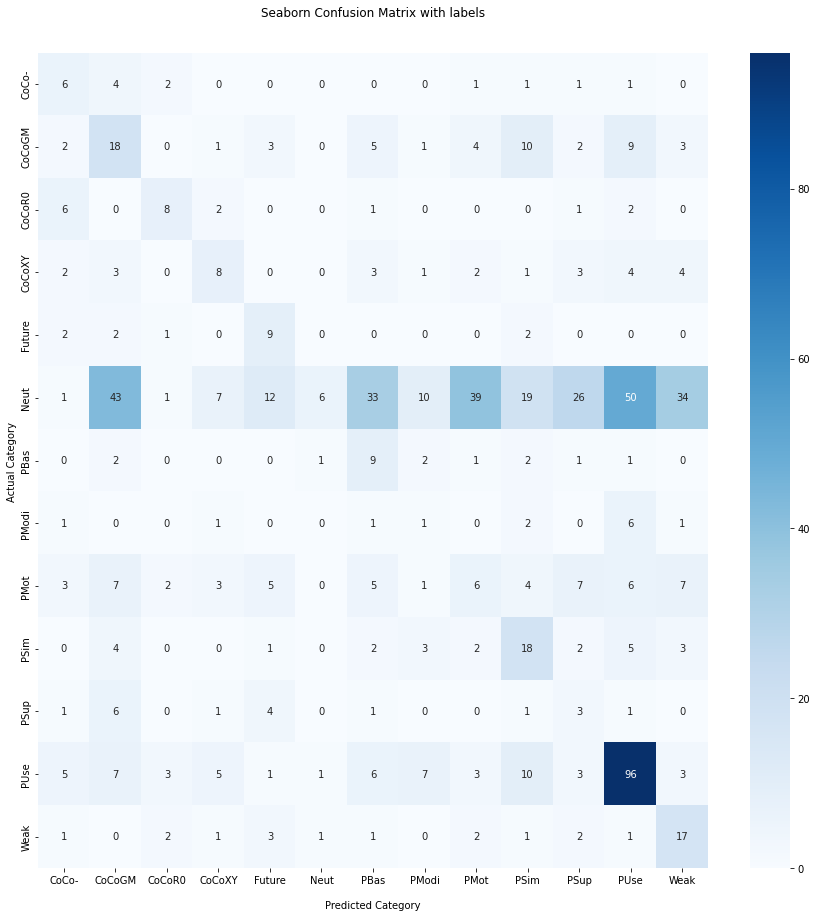

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
classifier = CitationClassifier3(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

print(classifier)

CitationClassifier3(
  (elmo): Elmo(
    (_elmo_lstm): _ElmoBiLm(
      (_token_embedder): _ElmoCharacterEncoder(
        (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
        (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
        (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
        (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
        (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
        (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
        (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
        (_highways): Highway(
          (_layers): ModuleList(
            (0): Linear(in_features=2048, out_features=4096, bias=True)
            (1): Linear(in_features=2048, out_features=4096, bias=True)
          )
        )
        (_projection): Linear(in_features=2048, out_features=512, bias=True)
      )
      (_elmo_lstm): ElmoLstm(
        (forward_layer_0): LstmCellWithProjection(
   

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5534842381110563	 val_acc=10.019723865877715
Epoch 1	 val_loss=2.479238519301781	 val_acc=21.36094674556213
Epoch 2	 val_loss=2.4727560740250807	 val_acc=19.072978303747533
Epoch 3	 val_loss=2.459741243949303	 val_acc=19.95069033530572
Epoch 4	 val_loss=2.449688242031977	 val_acc=22.573964497041423
Epoch 5	 val_loss=2.452168409640972	 val_acc=20.07889546351085
Epoch 6	 val_loss=2.3960864819013152	 val_acc=24.733727810650883
Epoch 7	 val_loss=2.418826414988591	 val_acc=24.99013806706114
Epoch 8	 val_loss=2.394872362797077	 val_acc=26.015779092702168
Epoch 9	 val_loss=2.418122190695542	 val_acc=27.001972386587774
Epoch 10	 val_loss=2.4239212182851935	 val_acc=25.246548323471398
Epoch 11	 val_loss=2.3692713425709644	 val_acc=30.009861932938858
Epoch 12	 val_loss=2.3843684930067788	 val_acc=28.964497041420113
Epoch 13	 val_loss=2.3743243492566624	 val_acc=28.708086785009865
Epoch 14	 val_loss=2.3841885878489575	 val_acc=29.3491124260355
Epoch 15	 val_loss=2.367549621141

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([ 8,  1, 11,  9,  7,  7,  5, 11,  9,  9,  1, 12, 11,  6,  8,  8, 11,  5,
         1, 12, 12,  6,  5,  6, 11,  1], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.09      0.12      0.11        16
      CoCoGM       0.23      0.24      0.24        58
      CoCoR0       0.30      0.40      0.34        20
      CoCoXY       0.00      0.00      0.00        31
      Future       0.20      0.38      0.26        16
        Neut       0.66      0.26      0.37       281
        PBas       0.17      0.53      0.25        19
       PModi       0.06      0.23      0.10        13
        PMot       0.23      0.34      0.27        56
        PSim       0.35      0.57      0.43        40
        PSup       0.12      0.17      0.14        18
        PUse       0.61      0.66      0.63       150
        Weak       0.30      0.50      0.37        32

    accuracy                           0.37       750
   macro avg       0.25      0.34      0.27       750
weighted avg       0.46      0.37      0.37       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

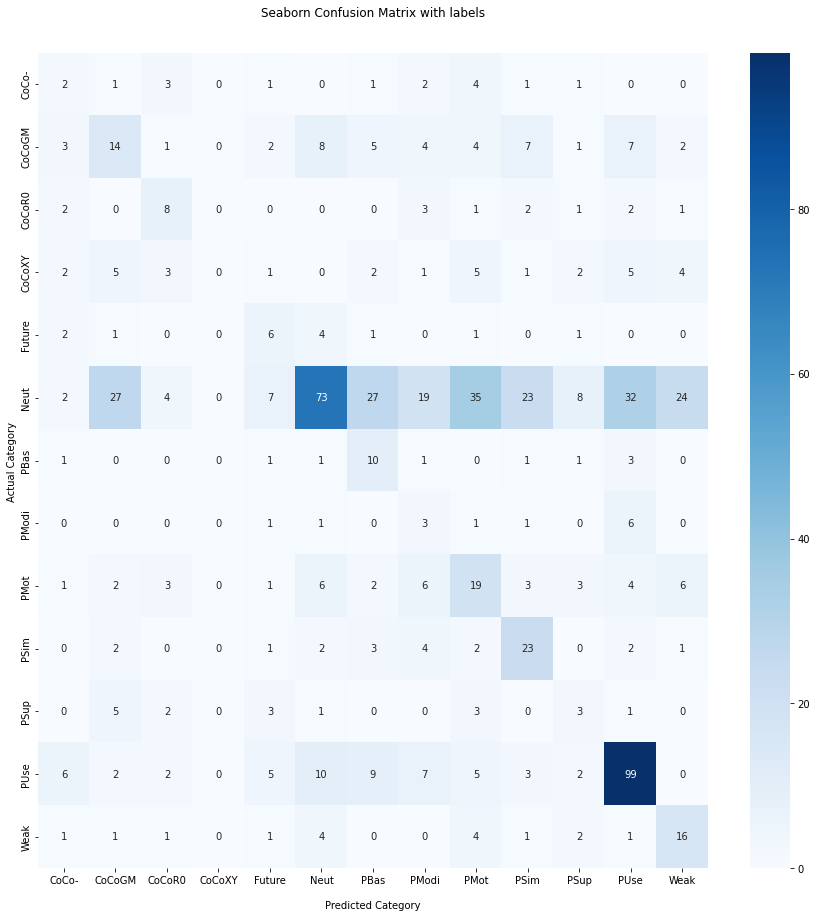

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5651583029673652	 val_acc=4.102564102564102
Epoch 1	 val_loss=2.565081119537353	 val_acc=4.102564102564102
Epoch 2	 val_loss=2.5647538166779738	 val_acc=4.102564102564102
Epoch 3	 val_loss=2.5635051910693822	 val_acc=5.512820512820512
Epoch 4	 val_loss=2.5648934107560373	 val_acc=9.289940828402367
Epoch 5	 val_loss=2.5623788008323083	 val_acc=9.122287968441816
Epoch 6	 val_loss=2.558837899794946	 val_acc=13.392504930966465
Epoch 7	 val_loss=2.552781884486859	 val_acc=18.1163708086785
Epoch 8	 val_loss=2.550569635171157	 val_acc=18.885601577909267
Epoch 9	 val_loss=2.5532535039461575	 val_acc=14.654832347140038
Epoch 10	 val_loss=2.5452522497910723	 val_acc=16.193293885601577
Epoch 11	 val_loss=2.545407047638526	 val_acc=17.218934911242606
Epoch 12	 val_loss=2.545358694516696	 val_acc=20.039447731755427
Epoch 13	 val_loss=2.5405681500068074	 val_acc=17.60355029585799
Epoch 14	 val_loss=2.5339580682607794	 val_acc=19.398422090729785
Epoch 15	 val_loss=2.53312300718747

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([12, 12, 12, 11, 11, 12, 12, 11, 11, 12, 12, 12,  9,  9, 11, 12, 12, 12,
        12, 12, 12, 12, 12, 12,  9, 12], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.00      0.00      0.00        16
      CoCoGM       0.00      0.00      0.00        58
      CoCoR0       0.00      0.00      0.00        20
      CoCoXY       0.00      0.00      0.00        31
      Future       0.00      0.00      0.00        16
        Neut       0.00      0.00      0.00       281
        PBas       0.00      0.00      0.00        19
       PModi       0.00      0.00      0.00        13
        PMot       0.00      0.00      0.00        56
        PSim       0.00      0.00      0.00        40
        PSup       0.00      0.00      0.00        18
        PUse       0.31      0.83      0.45       150
        Weak       0.08      0.81      0.15        32

    accuracy                           0.20       750
   macro avg       0.03      0.13      0.05       750
weighted avg       0.07      0.20      0.10       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

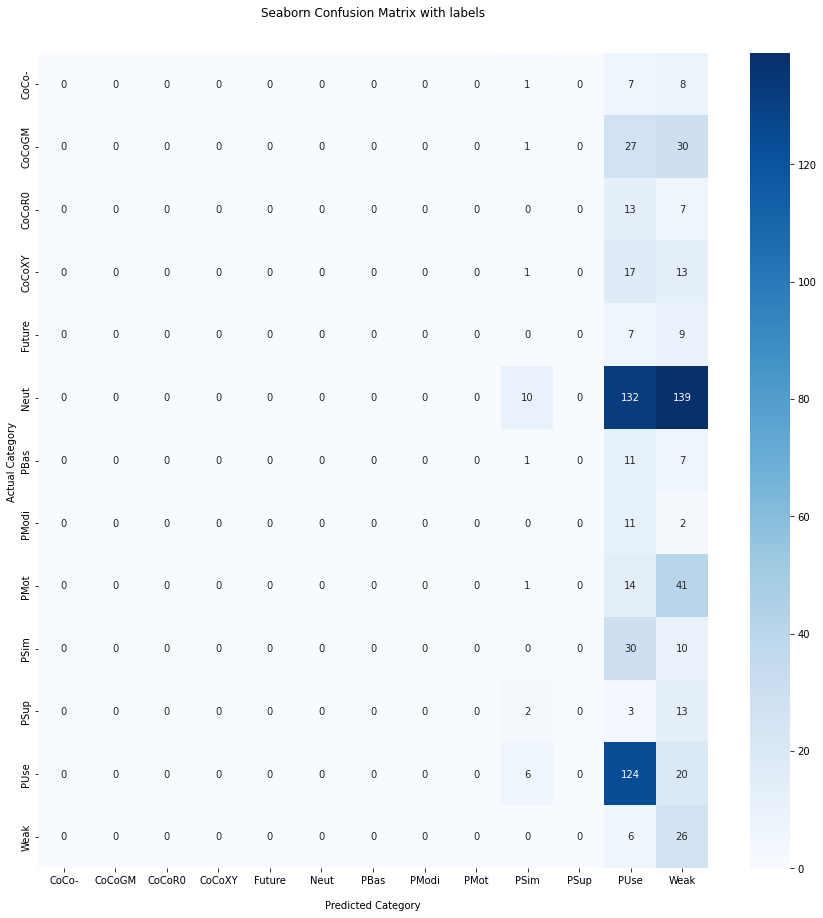

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# if you could generate a global attentive sentence vector and use that for classsification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output = self.attention_layer(packed_output)
        # print(packed_output.shape)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5459138246682977	 val_acc=10.700197238658776
Epoch 1	 val_loss=2.5147071709999667	 val_acc=32.66272189349112
Epoch 2	 val_loss=2.488067993750939	 val_acc=16.725838264299803
Epoch 3	 val_loss=2.48291161427131	 val_acc=16.83431952662722
Epoch 4	 val_loss=2.47182217011085	 val_acc=19.033530571992113
Epoch 5	 val_loss=2.4712702311002293	 val_acc=17.77120315581854
Epoch 6	 val_loss=2.465368261704078	 val_acc=18.796844181459562
Epoch 7	 val_loss=2.4720722895402174	 val_acc=19.03353057199211
Epoch 8	 val_loss=2.491549482712379	 val_acc=14.03353057199211
Epoch 9	 val_loss=2.447849594629728	 val_acc=21.745562130177515
Epoch 10	 val_loss=2.4461857997454137	 val_acc=22.209072978303748
Epoch 11	 val_loss=2.436907859948965	 val_acc=27.42603550295858
Epoch 12	 val_loss=2.4290053661053	 val_acc=26.52859960552268
Epoch 13	 val_loss=2.4348658873484688	 val_acc=21.124260355029584
Epoch 14	 val_loss=2.4331972140532274	 val_acc=23.54043392504931
Epoch 15	 val_loss=2.4385367448513318	 v

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([ 0,  4, 11,  9,  9, 11,  9,  7,  9,  9,  4, 12,  5,  9,  0,  6, 11,  9,
         5, 12,  0,  9,  5,  6, 11, 12], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.12      0.38      0.18        16
      CoCoGM       0.00      0.00      0.00        58
      CoCoR0       0.35      0.75      0.48        20
      CoCoXY       0.00      0.00      0.00        31
      Future       0.10      0.44      0.16        16
        Neut       0.55      0.20      0.29       281
        PBas       0.06      0.26      0.09        19
       PModi       0.03      0.15      0.05        13
        PMot       0.00      0.00      0.00        56
        PSim       0.01      0.03      0.02        40
        PSup       0.04      0.11      0.06        18
        PUse       0.53      0.49      0.51       150
        Weak       0.23      0.53      0.32        32

    accuracy                           0.25       750
   macro avg       0.16      0.26      0.17       750
weighted avg       0.34      0.25      0.25       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

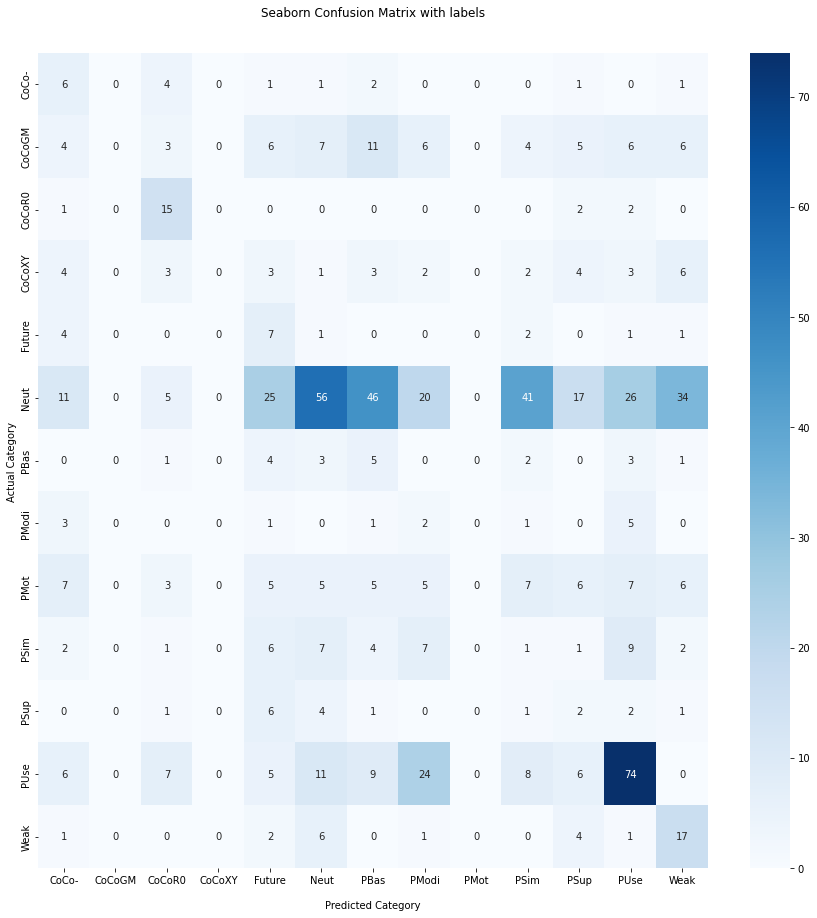

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#whether you can replace the sentence vector with max pooling of the sentence (as the sentence vector)
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier1(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier1, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        packed_output, (hidden, cell) = self.lstm(x)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        packed_output=torch.max(packed_output, 1)
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5530261810009294	 val_acc=15.591715976331361
Epoch 1	 val_loss=2.5205539831748376	 val_acc=28.668639053254438
Epoch 2	 val_loss=2.502183584066538	 val_acc=32.37672583826431
Epoch 3	 val_loss=2.4854914041665888	 val_acc=29.132149901380675
Epoch 4	 val_loss=2.485872387886047	 val_acc=30.5818540433925
Epoch 5	 val_loss=2.4898301638089695	 val_acc=19.566074950690332
Epoch 6	 val_loss=2.452698689240676	 val_acc=30.798816568047332
Epoch 7	 val_loss=2.455683176334087	 val_acc=28.8560157790927
Epoch 8	 val_loss=2.455302110085121	 val_acc=29.92110453648915
Epoch 9	 val_loss=2.4487530910051785	 val_acc=31.587771203155828
Epoch 10	 val_loss=2.447454379155086	 val_acc=30.670611439842205
Epoch 11	 val_loss=2.446113256307748	 val_acc=30.690335305719916
Epoch 12	 val_loss=2.4386154504922715	 val_acc=31.074950690335307
Epoch 13	 val_loss=2.4491433363694415	 val_acc=28.74753451676529
Epoch 14	 val_loss=2.4421012309881354	 val_acc=28.471400394477314
Epoch 15	 val_loss=2.4355041980743

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([ 4,  4, 11, 11, 11, 11, 12,  9,  5,  4,  5, 12,  5,  5,  0,  5, 11,  9,
         5,  5, 12,  5,  5,  9, 11, 12], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.09      0.12      0.11        16
      CoCoGM       0.27      0.10      0.15        58
      CoCoR0       0.29      0.65      0.40        20
      CoCoXY       0.00      0.00      0.00        31
      Future       0.11      0.44      0.17        16
        Neut       0.65      0.41      0.50       281
        PBas       0.00      0.00      0.00        19
       PModi       0.04      0.31      0.08        13
        PMot       0.00      0.00      0.00        56
        PSim       0.03      0.05      0.03        40
        PSup       0.00      0.00      0.00        18
        PUse       0.45      0.45      0.45       150
        Weak       0.20      0.62      0.30        32

    accuracy                           0.32       750
   macro avg       0.16      0.24      0.17       750
weighted avg       0.38      0.32      0.32       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

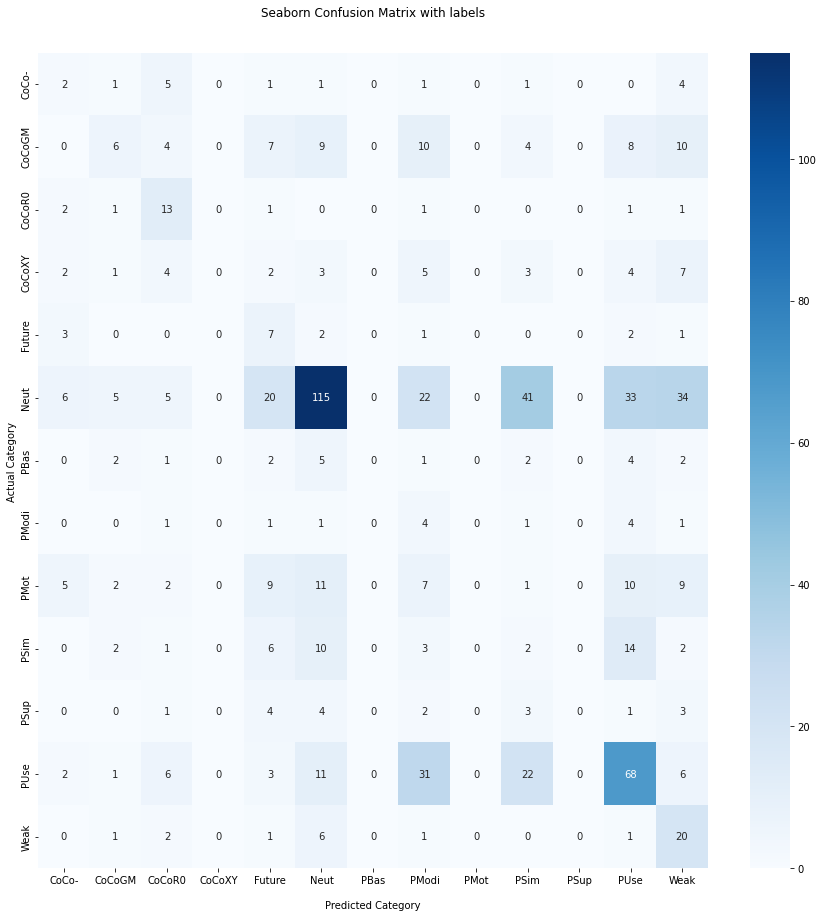

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# if you could append a global attentive sentence vector to citeseg and send the new feature vector for classsification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output1 = self.attention_layer(packed_output)
        # print(packed_output.shape)
        packed_output2=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        att_citeseg=torch.cat([packed_output1,packed_output2],dim=1)
        out = self.fc1(att_citeseg)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5313663207567654	 val_acc=31.242603550295854
Epoch 1	 val_loss=2.521430629950303	 val_acc=18.500986193293887
Epoch 2	 val_loss=2.4875634175080523	 val_acc=19.930966469428007
Epoch 3	 val_loss=2.481764729206378	 val_acc=19.802761341222876
Epoch 4	 val_loss=2.4758575146014876	 val_acc=20.355029585798817
Epoch 5	 val_loss=2.478686736180232	 val_acc=23.284023668639048
Epoch 6	 val_loss=2.485451203126174	 val_acc=23.540433925049307
Epoch 7	 val_loss=2.459593782058129	 val_acc=26.43984220907298
Epoch 8	 val_loss=2.4451802877279425	 val_acc=27.426035502958573
Epoch 9	 val_loss=2.44296879034776	 val_acc=27.278106508875737
Epoch 10	 val_loss=2.4407299390205965	 val_acc=27.297830374753445
Epoch 11	 val_loss=2.422080929462726	 val_acc=31.439842209072975
Epoch 12	 val_loss=2.4268770768092227	 val_acc=30.96646942800789
Epoch 13	 val_loss=2.401069366014921	 val_acc=28.70808678500986
Epoch 14	 val_loss=2.4007186706249537	 val_acc=29.11242603550296
Epoch 15	 val_loss=2.391761192908

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([10,  5,  9,  5,  8,  9,  5,  6,  9,  9,  1, 12,  5,  6,  0,  8,  7,  5,
         5, 12,  8,  5,  5,  9, 11,  6], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.22      0.31      0.26        16
      CoCoGM       0.18      0.09      0.12        58
      CoCoR0       0.50      0.65      0.57        20
      CoCoXY       0.00      0.00      0.00        31
      Future       0.29      0.31      0.30        16
        Neut       0.63      0.35      0.45       281
        PBas       0.11      0.47      0.18        19
       PModi       0.09      0.31      0.14        13
        PMot       0.22      0.30      0.25        56
        PSim       0.26      0.50      0.34        40
        PSup       0.09      0.17      0.12        18
        PUse       0.67      0.49      0.56       150
        Weak       0.24      0.53      0.33        32

    accuracy                           0.36       750
   macro avg       0.27      0.34      0.28       750
weighted avg       0.45      0.36      0.38       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

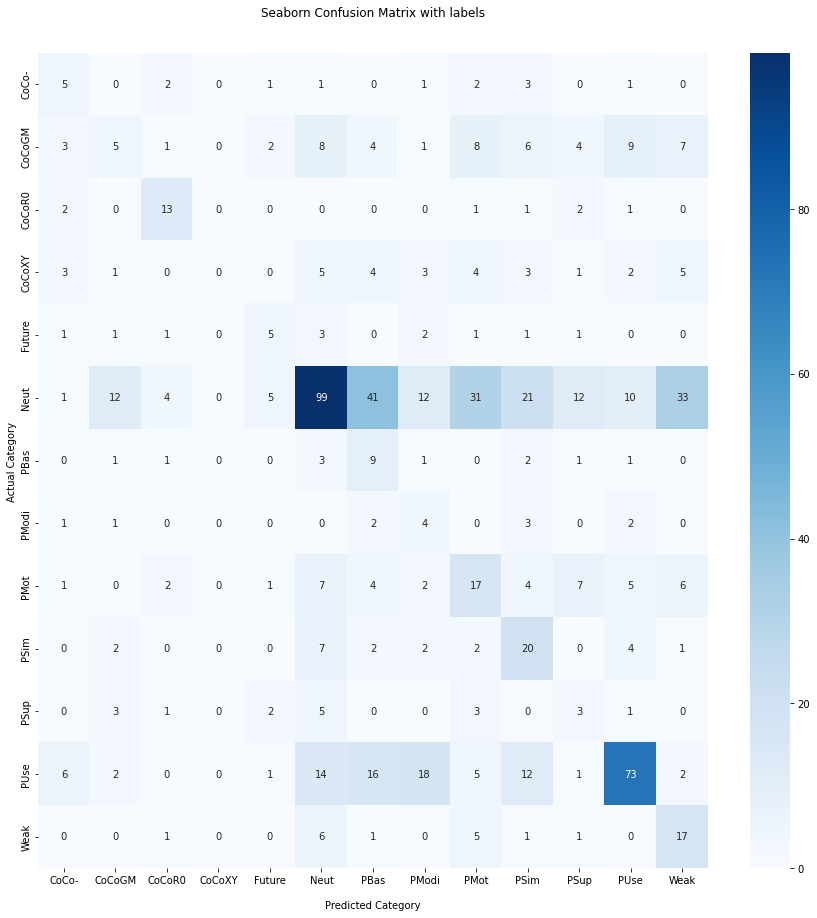

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()